In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from PIL import Image

In [4]:
from scipy.fft import fft2,fftshift

### Cargamos el GIF

In [5]:
img = Image.open('../resource/barbara.tif').convert('L')

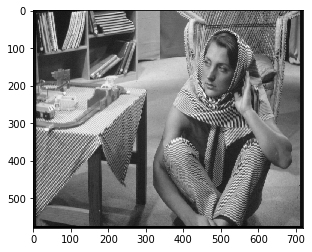

In [6]:
plt.imshow(img, cmap='gray')

In [23]:
(x_size, y_size) = img.size
print(f'{x_size} {y_size}')

720 580


In [24]:
imgs = np.zeros((120, y_size, x_size))

0.5833333333333334
1.2413793103448276
(720, 580)


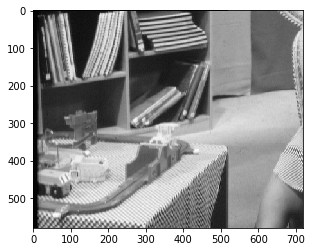

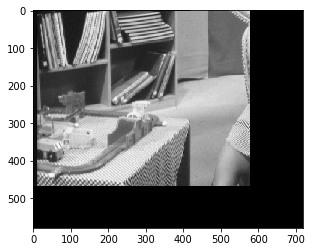

In [34]:
x_shrink = 300

desired_xsize = x_size - x_shrink
sh_factor = desired_xsize / x_size

img2 = img.transform((img.size), Image.AFFINE, (sh_factor,0,0,0,sh_factor,0))
(curr_ysize, curr_xsize) = img2.size

sc_factor = x_size / curr_xsize
img3 = img2.transform(img2.size, Image.AFFINE, (sc_factor,0,0,0,sc_factor,0))

Fd = fftshift(np.log(1+np.abs(fft2(img3))))

print(sh_factor)
print(sc_factor)
print(img2.size)
plt.figure()
plt.imshow(img2, cmap='gray')
plt.figure()
plt.imshow(img3, cmap='gray')

In [9]:
step = 5
for x_shrink in range(0,600,step):
    desired_xsize = x_size - x_shrink
    sh_factor = desired_xsize / x_size

    img2 = img.transform(img.size, Image.AFFINE, (sh_factor,0,0,0,sh_factor,0))
    (curr_ysize, curr_xsize) = img2.size
    
    sc_factor = x_size / curr_xsize
    img3 = img2.transform(img2.size, Image.AFFINE, (sc_factor,0,0,0,sc_factor,0))
    
    Fd = fftshift(np.log(1+np.abs(fft2(img3))))
    
    imgs[int(round(x_shrink/step)),:,:] = img3
#   fr = im2frame(f3, gray(256))
#     Fdr = im2frame(uint8(256*Fd/max(max(Fd))), gray(256))


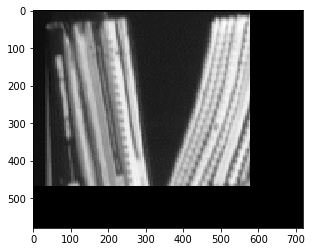

In [14]:
plt.imshow(imgs[119], cmap='gray')